In [8]:
from ilsmc.get_joint_prob_mat import get_joint_prob_mat
import pandas as pd

transitions = get_joint_prob_mat(
    t_A = 0.1,    t_B = 0.1,    t_AB = 1,    t_C = 1.1, 
    rho_A = 2,    rho_B = 1,    rho_AB = 3,  rho_C = 1,  rho_ABC = 1, 
    coal_A = 1,   coal_B = 0.5, coal_AB = 1, coal_C = 1, coal_ABC = 1,
    n_int_AB = 3, n_int_ABC = 3
)


In [9]:
pd.DataFrame(transitions, columns=['From', 'To', 'Prob'])

,From,To,Prob
0,"(0, 0, 0)","(0, 0, 0)",0.017348
1,"(0, 0, 0)","(0, 0, 1)",0.010399
2,"(0, 0, 1)","(0, 0, 0)",0.010399
3,"(0, 0, 0)","(0, 0, 2)",0.010399
4,"(0, 0, 2)","(0, 0, 0)",0.010399
...,...,...,...
724,"(2, 2, 2)","(2, 2, 2)",0.000101
725,"(2, 2, 2)","(3, 2, 2)",0.000091
726,"(3, 2, 2)","(1, 2, 2)",0.000075
727,"(3, 2, 2)","(2, 2, 2)",0.000091


In [10]:
pd.DataFrame(transitions, columns=['From', 'To', 'Prob'])['Prob'].sum()

0.9999999999999999

In [11]:
from ilsmc.get_emission_prob_mat import get_emission_prob_mat
import pandas as pd

mu = 0.05
emissions = get_emission_prob_mat(
    t_A = 0.1,    t_B = 0.1,    t_AB = 1,    t_C = 1.1,   t_upper = 5,   t_peak = 2,
    rho_A = 2,    rho_B = 1,    rho_AB = 3,  rho_C = 1,  rho_ABC = 1, 
    coal_A = 1,   coal_B = 0.5, coal_AB = 1, coal_C = 1, coal_ABC = 1,
    n_int_AB = 3, n_int_ABC = 3,
    mu_A = mu, mu_B = mu, mu_C = mu, mu_D = mu, mu_AB = mu, mu_ABC = mu
)

In [14]:
pd.melt(emissions, id_vars=['hidden_state'])

,hidden_state,variable,value
0,"(1, 0, 1)",AAAA,0.129257
1,"(2, 0, 1)",AAAA,0.129257
2,"(3, 0, 1)",AAAA,0.129257
3,"(1, 0, 2)",AAAA,0.123563
4,"(2, 0, 2)",AAAA,0.123563
...,...,...,...
6907,"(0, 1, 1)",GGGG,0.131229
6908,"(0, 1, 2)",GGGG,0.122682
6909,"(0, 2, 0)",GGGG,0.132482
6910,"(0, 2, 1)",GGGG,0.129405


In [13]:
pd.melt(emissions, id_vars=['hidden_state']).groupby('hidden_state')['value'].sum()

hidden_state
(0, 0, 0)    1.0
(0, 0, 1)    1.0
(0, 0, 2)    1.0
(0, 1, 0)    1.0
(0, 1, 1)    1.0
(0, 1, 2)    1.0
(0, 2, 0)    1.0
(0, 2, 1)    1.0
(0, 2, 2)    1.0
(1, 0, 0)    1.0
(1, 0, 1)    1.0
(1, 0, 2)    1.0
(1, 1, 1)    1.0
(1, 1, 2)    1.0
(1, 2, 2)    1.0
(2, 0, 0)    1.0
(2, 0, 1)    1.0
(2, 0, 2)    1.0
(2, 1, 1)    1.0
(2, 1, 2)    1.0
(2, 2, 2)    1.0
(3, 0, 0)    1.0
(3, 0, 1)    1.0
(3, 0, 2)    1.0
(3, 1, 1)    1.0
(3, 1, 2)    1.0
(3, 2, 2)    1.0
Name: value, dtype: float64

In [1]:
from ilsmc.get_joint_prob_mat import get_joint_prob_mat
import pandas as pd
from ilsmc.cutpoints import cutpoints_AB, cutpoints_ABC
import numpy as np
%load_ext rpy2.ipython

In [2]:
t_A = 5
t_B = 5
t_AB = 0.5
t_C = t_A+t_AB
rho_A = 0.01
rho_B = 0.01
rho_AB = 0.01
rho_C = 0.01
rho_ABC = 0.01
coal_A = 1
coal_B = 1
coal_AB = 1
coal_C = 1
coal_ABC = 1
n_int_AB = 3
n_int_ABC = 3

In [3]:
transitions = get_joint_prob_mat(
    t_A,    t_B,    t_AB,    t_C, 
    rho_A,  rho_B,  rho_AB,  rho_C,  rho_ABC, 
    coal_A, coal_B, coal_AB, coal_C, coal_ABC,
    n_int_AB, n_int_ABC
)




In [4]:
transitions

array([[(0, 0, 0), (0, 0, 0), 0.04254597564948106],
       [(0, 0, 0), (0, 0, 1), 0.00021324878874136153],
       [(0, 0, 1), (0, 0, 0), 0.00021324878874136153],
       ...,
       [(3, 2, 2), (1, 2, 2), 3.263633261269492e-05],
       [(3, 2, 2), (2, 2, 2), 3.291018259138309e-05],
       [(3, 2, 2), (3, 2, 2), 0.007139104377712319]], dtype=object)

In [5]:
trans_example = transitions.copy()
trans_example[:,0] = [str(i) for i in trans_example[:,0]]
trans_example[:,1] = [str(i) for i in trans_example[:,1]]
trans_example[0:10,:]

array([['(0, 0, 0)', '(0, 0, 0)', 0.04254597564948106],
       ['(0, 0, 0)', '(0, 0, 1)', 0.00021324878874136153],
       ['(0, 0, 1)', '(0, 0, 0)', 0.00021324878874136153],
       ['(0, 0, 0)', '(0, 0, 2)', 0.0002132487887413616],
       ['(0, 0, 2)', '(0, 0, 0)', 0.0002132487887413616],
       ['(0, 0, 1)', '(0, 0, 1)', 0.042441131446506374],
       ['(0, 0, 1)', '(0, 0, 2)', 0.00031809299171604806],
       ['(0, 0, 2)', '(0, 0, 1)', 0.00031809299171604806],
       ['(0, 0, 2)', '(0, 0, 2)', 0.04244113144650638],
       ['(0, 0, 0)', '(0, 1, 0)', 0.00011140211481330809]], dtype=object)

In [6]:
cut_HMM_AB = cutpoints_AB(n_int_AB, t_AB, coal_AB)
cut_HMM_ABC = t_AB+cutpoints_ABC(n_int_ABC, coal_ABC)
trans_example = pd.DataFrame(transitions).pivot(index = 0, columns = 1, values = 2)
names_HMM = list(trans_example.index)
pi_HMM = list(trans_example.sum(axis=1))
trans_example = np.array(trans_example.div(pi_HMM, axis=0))

In [7]:
np.random.seed(3)

n_pos = 2000

lst = np.zeros((n_pos, 5))

lst_states = np.empty((n_pos), dtype = object)

idx = np.random.choice(
    list(range(len(pi_HMM))), 
    p = pi_HMM
)
for i in range(n_pos):
    lst_states[i] = names_HMM[idx]
    lst[i] = [
        # V0, V1, V2, V3
        names_HMM[idx][0], 
        cut_HMM_AB[names_HMM[idx][1]] if names_HMM[idx][0] == 0 else cut_HMM_ABC[names_HMM[idx][1]],
        cut_HMM_ABC[names_HMM[idx][2]],
        cut_HMM_AB[names_HMM[idx][1]+1] if names_HMM[idx][0] == 0 else cut_HMM_ABC[names_HMM[idx][1]+1],
        cut_HMM_ABC[names_HMM[idx][2]+1],
    ]
    idx = np.random.choice(
        list(range(len(pi_HMM))), 
        p = list(trans_example[idx,:])
    )

df_HMM = pd.DataFrame(lst)

In [8]:
lst_states

array([(1, 1, 1), (1, 1, 1), (1, 1, 1), ..., (0, 2, 2), (0, 2, 2),
       (0, 2, 2)], dtype=object)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



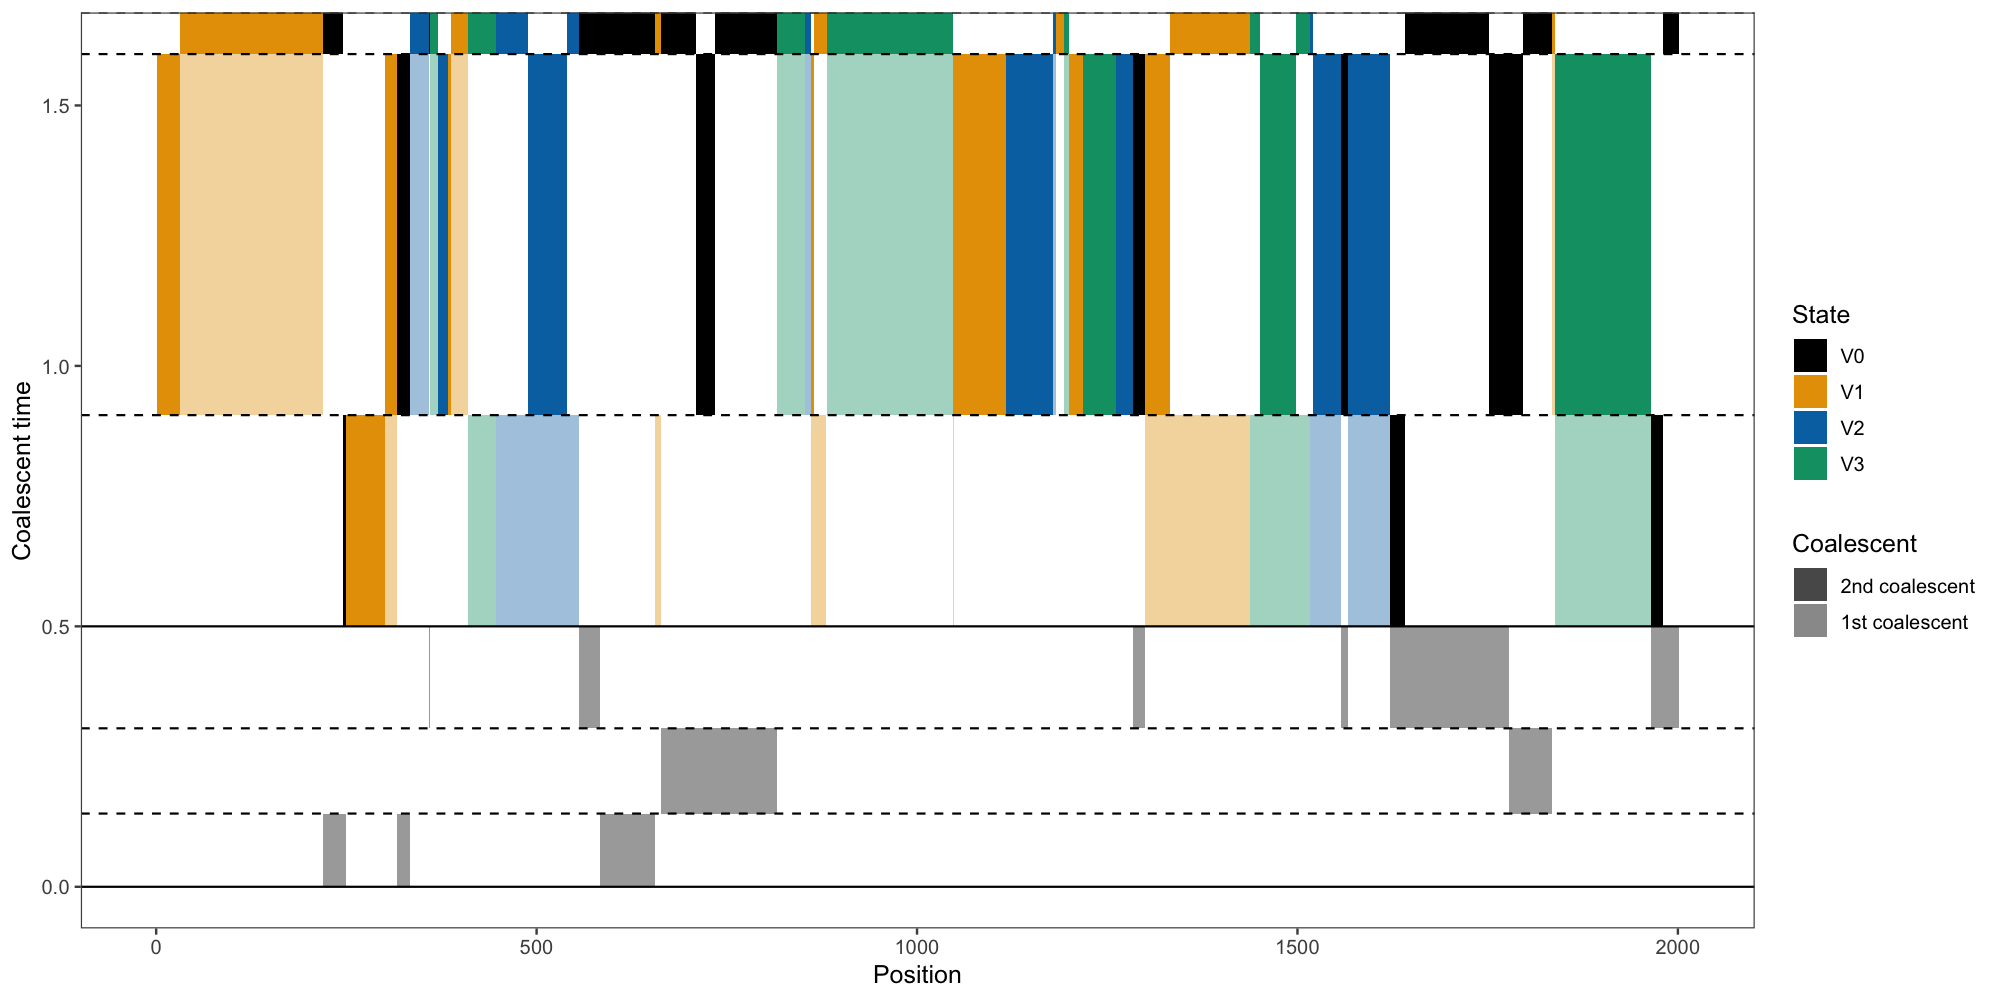

In [9]:
%%R -i df_HMM -i cut_HMM_AB -i cut_HMM_ABC -w 2000 -h 1000 -r 150

library(tidyverse)
library(ggthemes)

p1 <- df_HMM %>% 
    transmute(
        idx = 1:n(),
        state = paste0('V', as.character(`0`)),
        coal_1_min = `1`,
        coal_1_max = `3`,
        coal_2_min = `2`,
        coal_2_max = `4`
    ) %>%
    group_by(grp1 = with(rle(coal_1_min), rep(seq_along(lengths), lengths)),
             grp2 = with(rle(coal_1_max), rep(seq_along(lengths), lengths)),
             grp3 = with(rle(coal_2_min), rep(seq_along(lengths), lengths)),
             grp4 = with(rle(coal_2_max), rep(seq_along(lengths), lengths)),
             coal_1_min, coal_1_max, coal_2_min, coal_2_max, state
            ) %>%
    summarize(
        counter = n(),
        min_idx = min(idx),
        max_idx = max(idx),
        .groups = 'drop'
    ) %>%
    ungroup() %>%
    select(state, min_idx, max_idx, coal_1_min, coal_1_max, coal_2_min, coal_2_max, counter)  %>%
    arrange(min_idx) %>%
    ggplot() +
    geom_rect(aes(xmin = min_idx, xmax = max_idx+1, 
                  ymin = coal_1_min, ymax = coal_1_max, 
                  fill = state, alpha = '1st coalescent'), color = NA) +
    geom_rect(aes(xmin = min_idx, xmax = max_idx+1, 
                  ymin = coal_2_min, ymax = coal_2_max, 
                  fill = state, alpha = '2nd coalescent'), color = NA) +
    geom_hline(aes(yintercept = x), linetype = 2, data = tibble(x = cut_HMM_AB[2:(length(cut_HMM_AB)-1)])) +
    geom_hline(aes(yintercept = x), linetype = 2, data = tibble(x = cut_HMM_ABC[-1])) +
    geom_hline(aes(yintercept = x), data = tibble(x = c(cut_HMM_AB[1], cut_HMM_ABC[1]))) +
    theme_few() +
    scale_alpha_manual('Coalescent', values = c(1, 0.4), breaks = c('2nd coalescent', '1st coalescent')) +
    scale_fill_manual('State', values = c('black','#E69F00','#0072B2','#009E73','#CC79A7')) +
    labs(x = 'Position', y = 'Coalescent time')
    
p1

In [10]:
t_upper = 5
t_peak = 2
mu = 0.005

In [11]:
from ilsmc.get_emission_prob_mat import get_emission_prob_mat
import pandas as pd

emissions = get_emission_prob_mat(
    t_A,    t_B,    t_AB,    t_C,  t_upper, t_peak, 
    rho_A,  rho_B,  rho_AB,  rho_C,  rho_ABC, 
    coal_A, coal_B, coal_AB, coal_C, coal_ABC,
    n_int_AB, n_int_ABC,
    mu_A = mu, mu_B = mu, mu_C = mu, mu_D = mu, mu_AB = mu, mu_ABC = mu
)

In [12]:
df = pd.melt(emissions, id_vars=['hidden_state'])

emitted_state = []

np.random.seed(0)

for i in range(n_pos):
    
    filtered_df = df.loc[df['hidden_state'] == lst_states[i]]
    emitted_state.append(np.random.choice(
            filtered_df['variable'], 
            p = filtered_df['value']
        ))



In [13]:
sp1 = []
sp2 = []
sp3 = []
sp4 = []
for i in emitted_state:
    sp1.append(i[0])
    sp2.append(i[1])
    sp3.append(i[2])
    sp4.append(i[3])


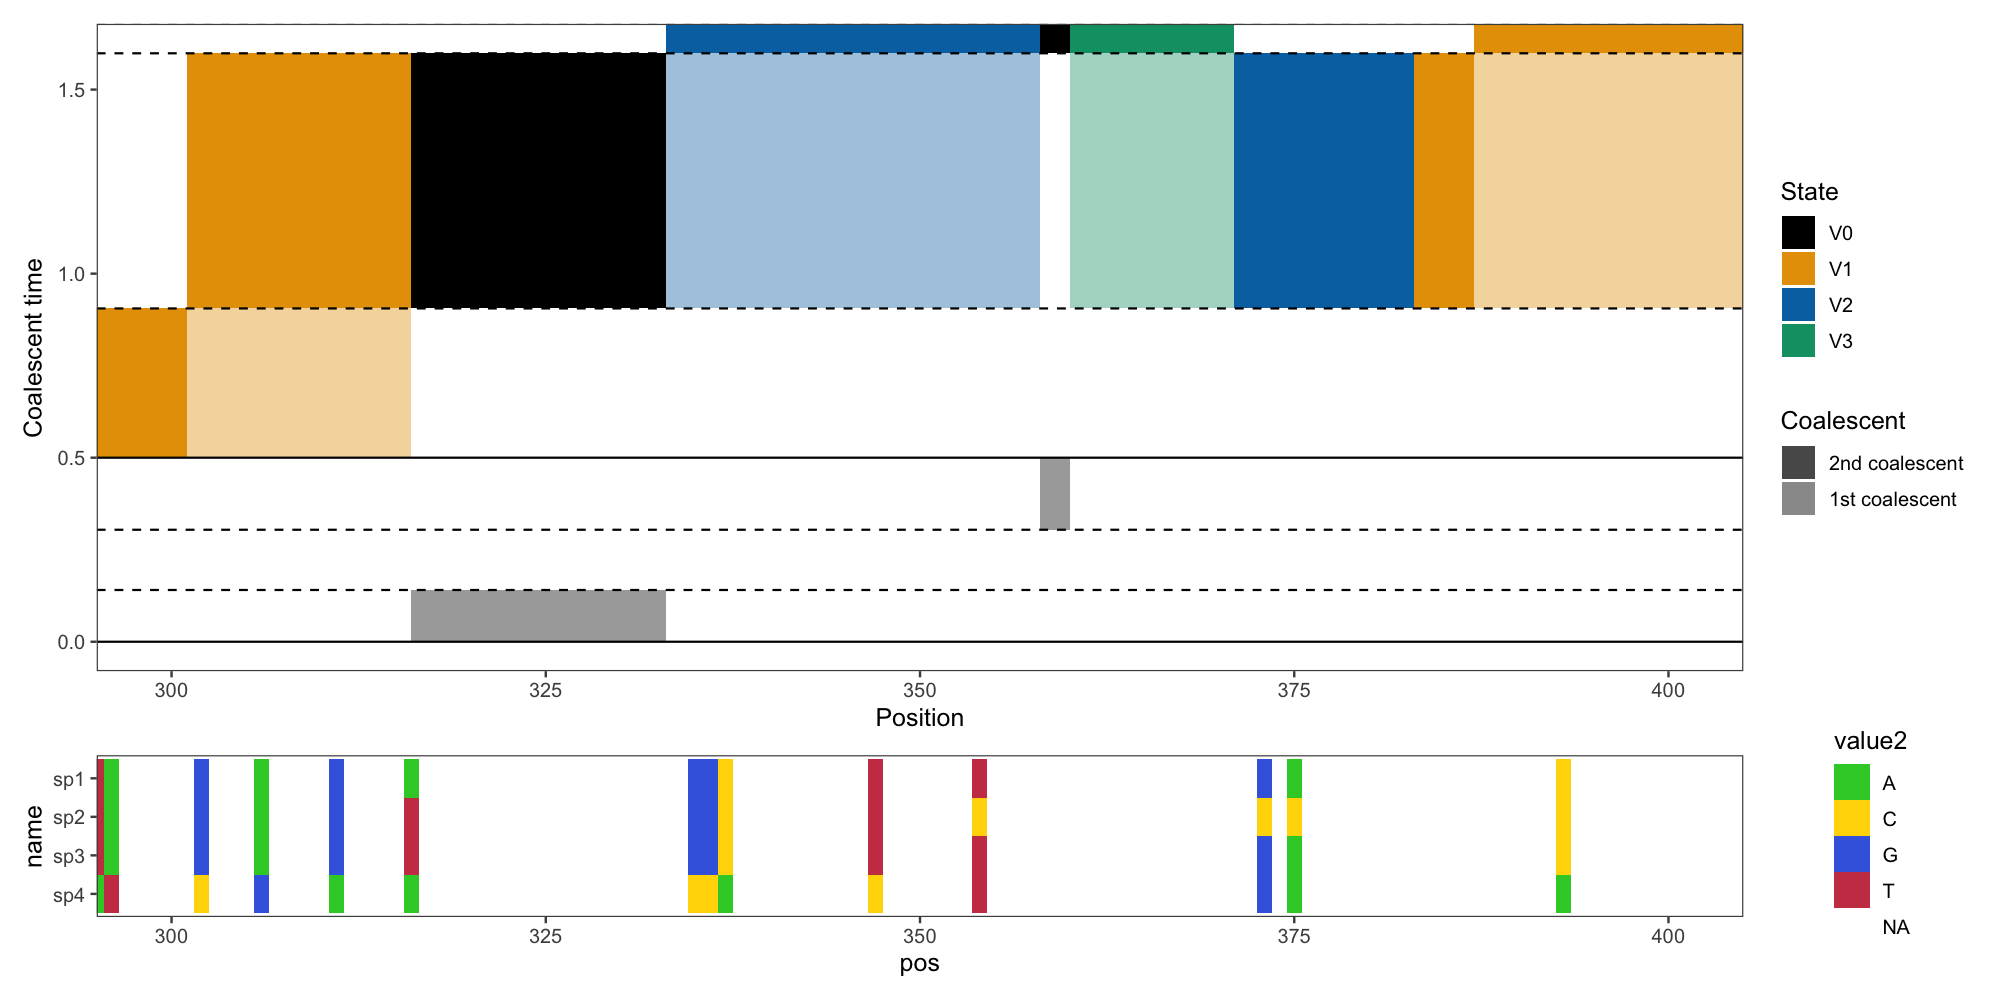

In [14]:
%%R -i sp1 -i sp2 -i sp3 -i sp4 -w 2000 -h 1000 -r 150

p2 <- tibble(
    pos = 1:length(sp1),
    sp1 = unlist(sp1),
    sp2 = unlist(sp2),
    sp3 = unlist(sp3),
    sp4 = unlist(sp4)
) %>%
    # top_n(500, pos) %>%
    pivot_longer(-pos) %>%
    group_by(pos) %>%
    mutate(
        colvar = length(unique(value)) == 1,
        value2 = ifelse(colvar, NA, value)
    ) %>%
    ggplot() +
    geom_tile(aes(pos, name, fill = value2)) +
    # geom_text(aes(pos, name, label = value)) +
    scale_fill_manual(values = c('#32cd32', '#FFD700', '#4169e1', '#cb4154'), na.value = 'white') +
    theme_few() +
    scale_y_discrete(limits=rev)
    

library(patchwork)

lims = c(300, 400)

(p1+coord_cartesian(xlim=lims))/(p2+coord_cartesian(xlim=lims)) + 
    plot_layout(heights = c(4, 1))

In [15]:
df2 = df.copy()
df2['hidden_state'] = [str(i) for i in df2['hidden_state']]
names_hidden = [str(i) for i in names_HMM]
trans = pd.DataFrame(trans_example)
trans.columns = ['S'+str(i) for i in list(trans.columns)]


In [19]:
%%R -i emitted_state -i df2 -i names_hidden -i trans_example -i pi_HMM -i trans_example

emitted_state <- unlist(emitted_state)
names_hidden <- unlist(names_hidden)
emitted_idx <- match(emitted_state, sort(unique(df2$variable)))
df3 <- df2 %>% 
    as_tibble() %>% 
    pivot_wider(names_from = 'variable', values_from = 'value') %>% 
    select(hidden_state, sort(unique(df2$variable))) %>% 
    mutate(hidden_state = factor(hidden_state, names_hidden)) %>% 
    arrange(hidden_state)

emission_probs <- select(df3, -hidden_state) %>% 
    as.matrix()
transition_probs <- unlist(trans_example) %>% matrix(ncol = length(names_hidden))

initial_probs <- unlist(pi_HMM)
 

In [20]:
%%R

logFrwdLikFct <- function(InitProb,TransProb,EmisProb,ObsSeq){
  # Number of observations
  len <- length(ObsSeq)
  # Number of hidden states
  nHS <- nrow(TransProb)
  # Define logForwardLik
  logForwardLik <- matrix(0,nrow=len,ncol=nHS)
  # Start condition
  logForwardLik[1,] <- log(InitProb*EmisProb[,ObsSeq[1]])
  # Determine logForwardLik by recursion 
  for(k in 2:len){
    a <- max(logForwardLik[k-1,])
    # Calculate the loglik of current iteration
    logForwardLik[k,] <- 
      log(colSums(
          (exp(logForwardLik[k-1,]-a)%*%TransProb)*EmisProb[,ObsSeq[k]]
      ))+a
  }  
  # a <- max(logForwardLik[len,])
  # logForwardLikVal <- log(sum(EndProb*exp(logForwardLik[len,]-a)))+a
  return(logForwardLik)
}

logBkwdLikFct <- function(TransProb,EmisProb,ObsSeq){
  # Number of observations
  len <- length(ObsSeq)
  # Number of hidden states
  nHS <- nrow(TransProb)
  # Define logBackwardLik
  logBackwardLik <- matrix(0,nrow=len,ncol=nHS)
  # Determine logForwardLik by recursion 
  for(k in (len-1):1){
    a <- max(logBackwardLik[k+1,])
    # Calculate the loglik of current iteration
    logBackwardLik[k,] <- 
      log(colSums(
          (exp(logBackwardLik[k+1,]-a)%*%TransProb)*EmisProb[,ObsSeq[k]]
      ))+a
  }  
  return(logBackwardLik)
}



In [21]:
%%R -o post_prob

# log(initial_probs*emission_probs[, emitted_idx[1]])

mat_forward <- logFrwdLikFct(initial_probs, transition_probs, emission_probs, emitted_idx)
mat_backward <- logBkwdLikFct(transition_probs, emission_probs, emitted_idx)
max_df <- apply(mat_forward+mat_backward, 1, which.max)


post_prob <- (mat_forward+mat_backward)
# Get state with maximum likelihood per row
# This is for doing the trick for very low probs
max_row <- apply(mat_forward+mat_backward, 1, max)
# Calculate the posterior probability per state
post_prob <- (exp(post_prob-max_row)/rowSums(exp(post_prob-max_row)))

In [22]:
df = pd.DataFrame(post_prob).melt(ignore_index = False)
df.reset_index(inplace=True)
df

,index,variable,value
0,0,0,0.060501
1,1,0,0.060526
2,2,0,0.060558
3,3,0,0.060595
4,4,0,0.060637
...,...,...,...
53995,1995,26,0.024973
53996,1996,26,0.025258
53997,1997,26,0.024631
53998,1998,26,0.025572


In [23]:
lst_states_str = [str(i) for i in lst_states]

In [35]:
%%R -i df -i lst_states_str -o x

lst_states_str <- unlist(lst_states_str)

x <- df %>%
    as_tibble() %>%
    group_by(index) %>%
    mutate(max_var = variable[which.max(value)]) %>% 
    arrange(index) %>%
    ungroup() %>%
    mutate(var_name = names_hidden[variable+1]) %>%
    select(-variable) %>%
    pivot_wider(values_from = value, names_from = var_name) %>%
    mutate(
        max_var = names_hidden[max_var+1],
        true_var = lst_states_str
    ) %>%
    select(index, ends_with('var'), everything())  %>%
    {.}
x

# A tibble: 2,000 × 30
   index max_var   true_var  `(0, 0, 0)` `(0, 0, 1)` `(0, 0, 2)` `(0, 1, 0)`
   <int> <chr>     <chr>           <dbl>       <dbl>       <dbl>       <dbl>
 1     0 (3, 0, 1) (1, 1, 1)      0.0605      0.0489      0.0260      0.0606
 2     1 (3, 0, 1) (1, 1, 1)      0.0605      0.0487      0.0255      0.0607
 3     2 (3, 0, 1) (1, 1, 1)      0.0606      0.0486      0.0250      0.0607
 4     3 (3, 0, 1) (1, 1, 1)      0.0606      0.0485      0.0245      0.0607
 5     4 (3, 0, 1) (1, 1, 1)      0.0606      0.0483      0.0240      0.0608
 6     5 (3, 0, 1) (1, 1, 1)      0.0607      0.0482      0.0236      0.0608
 7     6 (3, 0, 1) (1, 1, 1)      0.0607      0.0481      0.0231      0.0609
 8     7 (3, 0, 1) (1, 1, 1)      0.0608      0.0480      0.0226      0.0609
 9     8 (3, 0, 1) (1, 1, 1)      0.0608      0.0479      0.0221      0.0610
10     9 (3, 0, 1) (1, 1, 1)      0.0609      0.0478      0.0217      0.0611
# … with 1,990 more rows, and 23 more variables: (0, 

In [46]:
x.head(500)

,index,max_var,true_var,"(0, 0, 0)","(0, 0, 1)","(0, 0, 2)","(0, 1, 0)","(0, 1, 1)","(0, 1, 2)","(0, 2, 0)",...,"(2, 0, 2)","(2, 1, 1)","(2, 1, 2)","(2, 2, 2)","(3, 0, 0)","(3, 0, 1)","(3, 0, 2)","(3, 1, 1)","(3, 1, 2)","(3, 2, 2)"
1,0,"(3, 0, 1)","(1, 1, 1)",0.060501,0.048873,0.026006,0.060647,0.048705,0.025663,0.060831,...,0.041891,0.020564,0.021747,0.004088,0.042905,0.071509,0.043126,0.020658,0.021988,0.004088
2,1,"(3, 0, 1)","(1, 1, 1)",0.060526,0.048724,0.025505,0.060669,0.048554,0.025168,0.060850,...,0.041030,0.021441,0.021569,0.004796,0.043609,0.070898,0.042281,0.021542,0.021820,0.004796
3,2,"(3, 0, 1)","(1, 1, 1)",0.060558,0.048584,0.025011,0.060699,0.048413,0.024680,0.060878,...,0.040192,0.022287,0.021391,0.005468,0.044298,0.070323,0.041461,0.022396,0.021652,0.005468
4,3,"(3, 0, 1)","(1, 1, 1)",0.060595,0.048451,0.024522,0.060735,0.048280,0.024198,0.060914,...,0.039376,0.023106,0.021213,0.006109,0.044972,0.069782,0.040664,0.023222,0.021485,0.006108
5,4,"(3, 0, 1)","(1, 1, 1)",0.060637,0.048325,0.024038,0.060778,0.048155,0.023721,0.060958,...,0.038581,0.023898,0.021035,0.006720,0.045631,0.069272,0.039888,0.024023,0.021317,0.006720
6,5,"(3, 0, 1)","(1, 1, 1)",0.060684,0.048206,0.023558,0.060826,0.048037,0.023249,0.061009,...,0.037805,0.024665,0.020855,0.007306,0.046277,0.068793,0.039132,0.024798,0.021149,0.007306
7,6,"(3, 0, 1)","(1, 1, 1)",0.060736,0.048093,0.023082,0.060881,0.047927,0.022781,0.061067,...,0.037045,0.025409,0.020674,0.007870,0.046910,0.068343,0.038393,0.025551,0.020980,0.007869
8,7,"(3, 0, 1)","(1, 1, 1)",0.060791,0.047985,0.022608,0.060940,0.047823,0.022316,0.061131,...,0.036302,0.026130,0.020492,0.008414,0.047531,0.067920,0.037671,0.026282,0.020810,0.008413
9,8,"(3, 0, 1)","(1, 1, 1)",0.060850,0.047882,0.022137,0.061003,0.047724,0.021854,0.061201,...,0.035573,0.026832,0.020307,0.008941,0.048140,0.067522,0.036965,0.026992,0.020638,0.008940
10,9,"(3, 0, 1)","(1, 1, 1)",0.060911,0.047785,0.021666,0.061071,0.047631,0.021394,0.061276,...,0.034857,0.027513,0.020119,0.009454,0.048737,0.067149,0.036272,0.027683,0.020464,0.009453
